Reference:
https://www.curiousily.com/posts/demand-prediction-with-lstms-using-tensorflow-2-and-keras-in-python/

In [242]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters


In [243]:
df = pd.read_csv("ge3_data_all_beta.csv")

In [244]:
df.shape

(2478, 10)

In [245]:
df.head()

,v_fl,v_fr,v_rl,v_rr,yawrate,ay,ax,swa,swa_d,beta
0,0.0,0.0,0.0,0.0,-0.220000,-0.108625,0.027009,-7.200000,4,-0.15
1,0.0,0.0,0.0,0.0,-0.061850,-0.104446,0.027009,-7.021471,4,-0.15
2,0.0,0.0,0.0,0.0,0.315773,-0.085688,0.031198,-6.800000,4,-0.15
3,0.0,0.0,0.0,0.0,-0.046483,-0.081498,0.027009,-6.700000,0,-0.15
4,0.0,0.0,0.0,0.0,0.064978,-0.104424,0.049934,-6.900000,4,-0.15


In [252]:
cor=df[['v_fl','v_fr','v_rl','v_rr','yawrate','ay','ax','swa','swa_d','beta']].corr()
cor

,v_fl,v_fr,v_rl,v_rr,yawrate,ay,ax,swa,swa_d,beta
v_fl,1.000000,0.998523,0.999363,0.998658,0.020225,0.035588,-0.257080,0.033407,0.120213,0.001963
v_fr,0.998523,1.000000,0.998606,0.999363,-0.031559,-0.011706,-0.256740,-0.015778,0.126018,0.041848
v_rl,0.999363,0.998606,1.000000,0.998472,0.010279,0.026084,-0.274875,0.025507,0.124203,0.014429
v_rr,0.998658,0.999363,0.998472,1.000000,-0.018239,0.002339,-0.274593,-0.004433,0.129941,0.022852
yawrate,0.020225,-0.031559,0.010279,-0.018239,1.000000,0.897995,-0.004184,0.961369,-0.125763,-0.733181
ay,0.035588,-0.011706,0.026084,0.002339,0.897995,1.000000,-0.012497,0.799842,-0.089429,-0.869988
ax,-0.257080,-0.256740,-0.274875,-0.274593,-0.004184,-0.012497,1.000000,-0.024201,-0.264479,0.028525
swa,0.033407,-0.015778,0.025507,-0.004433,0.961369,0.799842,-0.024201,1.000000,-0.133814,-0.591497
swa_d,0.120213,0.126018,0.124203,0.129941,-0.125763,-0.089429,-0.264479,-0.133814,1.000000,0.017887
beta,0.001963,0.041848,0.014429,0.022852,-0.733181,-0.869988,0.028525,-0.591497,0.017887,1.000000


<Figure size 432x432 with 0 Axes>

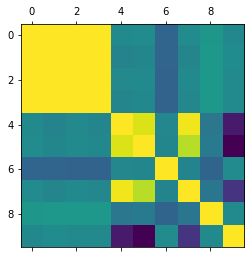

In [251]:
cor=df[['v_fl','v_fr','v_rl','v_rr','yawrate','ay','ax','swa','swa_d','beta']].corr()
plt.figure(figsize=(6,6))
plt.matshow(cor)
plt.show()

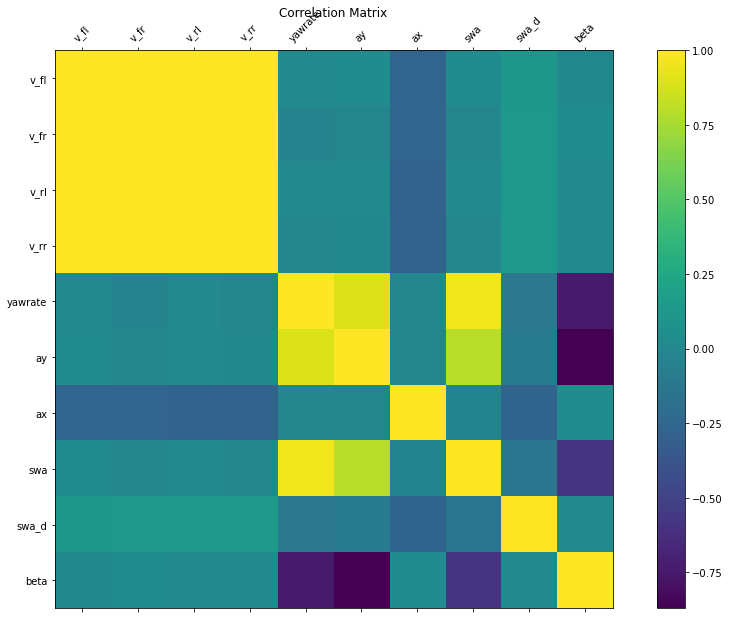

In [257]:
f = plt.figure(figsize=(16, 10))
plt.matshow(cor, fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=12);

Preprocessing: 
- We’ll use the last 10% of the data for testing

In [258]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

1982 496


9 features used to estimate side-slip angle:
Scaling features and outputs

In [259]:
from sklearn.preprocessing import RobustScaler

f_columns = ['v_fl', 'v_fr', 'v_rl', 'v_rr', 'yawrate',	'ay', 'ax',	'swa', 'swa_d']

f_transformer = RobustScaler()
beta_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
beta_transformer = beta_transformer.fit(train[['beta']])

# scaling output beta
train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['beta'] = beta_transformer.transform(train[['beta']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['beta'] = beta_transformer.transform(test[['beta']])

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [162]:
train.shape, train.beta.shape, test.shape

((1982, 10), (1982,), (496, 10))

To prepare the sequences:

In [260]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

Each sequence is going to contain 'time_steps' data points from the history:

In [319]:
time_steps = 2

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.beta, time_steps)
X_test, y_test = create_dataset(test, test.beta, time_steps)

# X_train, y_train = create_dataset(train[f_columns], train.beta, time_steps)
# X_test, y_test = create_dataset(test[f_columns], test.beta, time_steps)

print(X_train.shape, y_train.shape)

(1980, 2, 10) (1980,)


Prediction: 
- base RNN
- LSTM
- GRU
- One layer of Bidirectional LSTM with a Dropout layer:

In [320]:
model = keras.Sequential()
# model.add(keras.layers.SimpleRNN(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(keras.layers.LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.GRU(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [191]:
# model = keras.Sequential()
# model.add(
#   keras.layers.Bidirectional( keras.layers.LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])) )
# )
# model.add(keras.layers.Dropout(rate=0.1))
# model.add(keras.layers.Dense(units=1))
# model.compile(loss='mean_squared_error', optimizer='adam')

Prediciton2:
- 

In [111]:
# model = keras.Sequential()
# model.add(keras.layers.Dense(2, activation='relu', use_bias=False, input_dim=9))
# model.add(keras.layers.Dense(units=1, activation='sigmoid'))
# model.compile(loss='mean_squared_error', optimizer='adam')

# from keras.models import Sequential
# from keras.layers import Dense

# model = Sequential()
# #model.add(Dense(2, activation='relu',use_bias=False, input_dim=2*past))
# model.add(Dense(2, activation='linear', use_bias=False, input_dim=2*past))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
# history=model.fit(X_train, Y_train, epochs=1000, batch_size=20, validation_data=(X_validate,Y_validate), verbose=2)


In [321]:
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=64, 
    validation_split=0.2,
    shuffle=False
)
# history.history.keys()
# history.history

Train on 1584 samples, validate on 396 samples
Epoch 1/100
1584/1584 [==============================] - 2s 2ms/sample - loss: 10.2896 - val_loss: 2.0143
Epoch 2/100
1584/1584 [==============================] - 0s 72us/sample - loss: 7.1382 - val_loss: 1.3999
Epoch 3/100
1584/1584 [==============================] - 0s 72us/sample - loss: 5.4457 - val_loss: 1.1559
Epoch 4/100
1584/1584 [==============================] - 0s 77us/sample - loss: 4.1848 - val_loss: 0.9283
Epoch 5/100
1584/1584 [==============================] - 0s 84us/sample - loss: 3.2954 - val_loss: 0.6970
Epoch 6/100
1584/1584 [==============================] - 0s 79us/sample - loss: 2.5796 - val_loss: 0.5100
Epoch 7/100
1584/1584 [==============================] - 0s 82us/sample - loss: 2.1345 - val_loss: 0.3694
Epoch 8/100
1584/1584 [==============================] - 0s 76us/sample - loss: 1.7237 - val_loss: 0.2757
Epoch 9/100
1584/1584 [==============================] - 0s 76us/sample - loss: 1.4793 - val_loss: 0.2186

Evaluation:

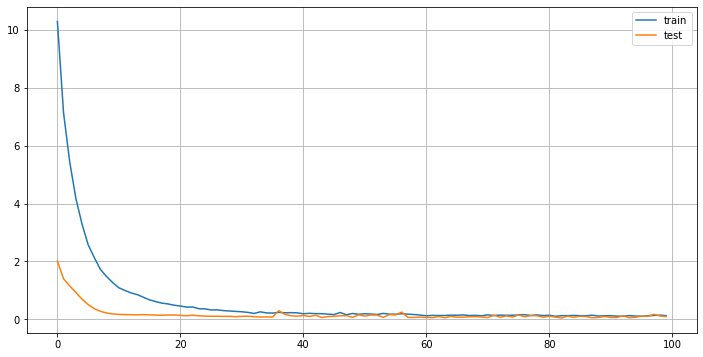

In [322]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();
plt.grid()

In [133]:
# plt.figure(figsize=(12,6))
# plt.plot(history.history['mean_squared_error'], label='train')
# plt.plot(history.history['val_mean_squared_error'], label='test')
# plt.legend();
# plt.grid()

In [323]:
y_pred = model.predict(X_test)

In [324]:
y_train_inv = beta_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = beta_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = beta_transformer.inverse_transform(y_pred)

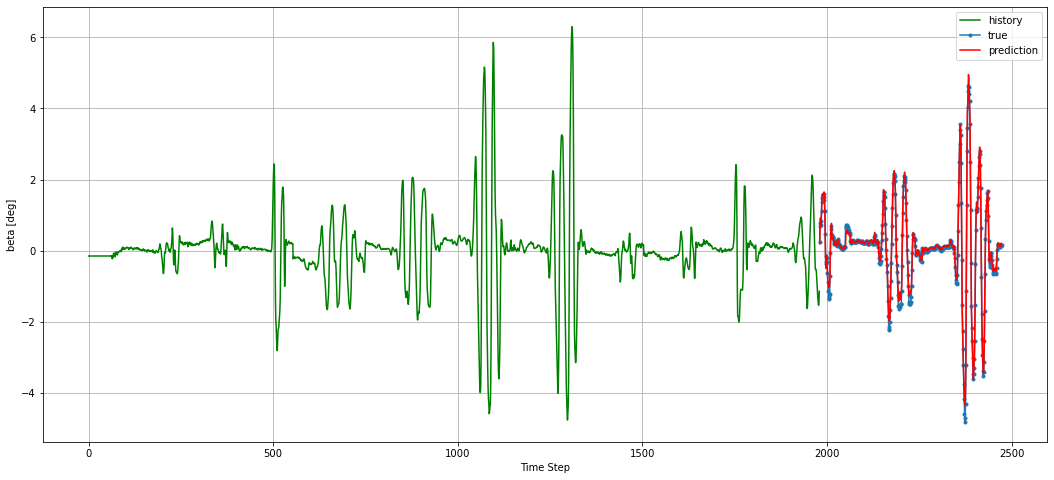

In [325]:
plt.figure(figsize=(18,8))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('beta [deg]')
plt.xlabel('Time Step')
plt.legend()
plt.grid()
plt.show();

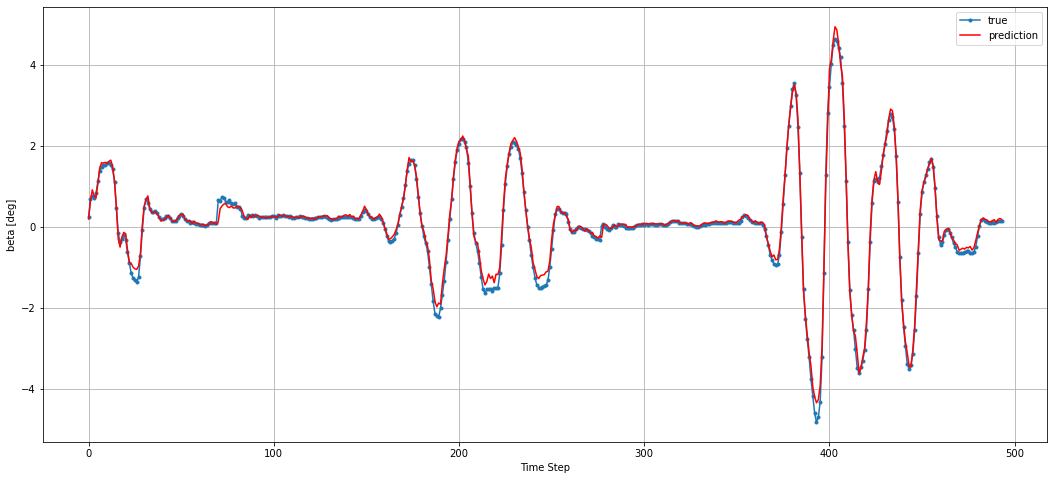

In [326]:
plt.figure(figsize=(18,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('beta [deg]')
plt.xlabel('Time Step')
plt.legend()
plt.grid()
plt.show();

In [269]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_14 (SimpleRNN)    (None, 64)                4800      
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [270]:
test_scores = model.evaluate(X_test, y_test, batch_size=64)
print("Test loss:", test_scores)
# print("Test loss:", test_scores[0])
# print("Test accuracy:", test_scores[1])
# test_scores

493/493 [==============================] - 0s 53us/sample - loss: 0.0840
Test loss: 0.08401179420204481


In [271]:
test_scores.shape, X_test.shape, y_test.shape

((), (493, 3, 10), (493,))

In [272]:
train_scores = model.evaluate(X_train, y_train, batch_size=64)
print("Train loss:", train_scores)
# train_scores = model.evaluate(X_train, y_train, verbose=2)
# print("Train loss:", train_scores[0])
# print("Train accuracy:", train_scores[1])

1979/1979 [==============================] - 0s 35us/sample - loss: 0.0688
Train loss: 0.06883782702542846


In [327]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_ = np.sqrt(mean_squared_error(y_test,y_pred))
r2_ = r2_score(y_test,y_pred)
print(rmse_)
print(r2_)

0.3355298306414639
0.991695063850441
